In [5]:
# Week 2: Model Preparation and Initial Modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
file_path = r"C:\Users\Faizan\OneDrive - BENNETT UNIVERSITY\blood disease\cardio_train.csv\cleaned_cardio_data.csv"
df = pd.read_csv(file_path)

# Quick check to confirm loading
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (64502, 16)
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   8  21914       1     151    67.0    120     80            2     2      0   

   alco  active  cardio  age_years        bmi age_group  
0     0       1       0         50  21.967120    Senior  
1     0       1       1         55  34.927679    Senior  
2     0       0       1         51  23.507805    Senior  
3     0       1       1         48  28.710479    Senior  
4     0       0       0         60  29.384676   Elderly  


In [7]:
df['bp_category'] = pd.cut(df['ap_hi'], 
                          bins=[0, 120, 130, 140, float('inf')], 
                          labels=['Normal', 'Elevated', 'High Stage 1', 'High Stage 2'], 
                          right=False)

# Interaction feature: ap_hi * ap_lo (pulse pressure influence)
df['bp_interaction'] = df['ap_hi'] * df['ap_lo']

# Encode categorical features (age_group and bp_category)
df = pd.get_dummies(df, columns=['age_group', 'bp_category'], drop_first=True)

# Define features and target
X = df.drop(columns=['id', 'age', 'cardio'])  # Drop 'id', 'age', and 'cardio'
y = df['cardio']

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'bp_interaction']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Check the updated dataset
print("\nUpdated Dataset Shape:", X.shape)
print("\nFirst 5 rows of features (X):")
print(X.head())
print("\nFirst 5 rows of target (y):")
print(y.head())


Updated Dataset Shape: (64502, 19)

First 5 rows of features (X):
   gender    height    weight     ap_hi     ap_lo  cholesterol  gluc  smoke  \
0       2  0.434774 -0.867033 -1.155650 -0.231996            1     1      0   
1       1 -1.037946  0.759313  0.929925  1.064481            3     1      0   
2       1  0.066594 -0.725612  0.234734 -1.528473            3     1      0   
3       2  0.557500  0.547181  1.625117  2.360958            1     1      0   
4       1 -1.651579 -0.513480 -0.460458 -0.231996            2     2      0   

   alco  active  age_years       bmi  bp_interaction  age_group_Middle-aged  \
0     0       1  -0.430631 -0.930632       -0.800402                  False   
1     0       1   0.310824  1.231883        1.060027                  False   
2     0       0  -0.282340 -0.673563       -0.653526                  False   
3     0       1  -0.727212  0.194522        2.235034                  False   
4     0       0   1.052279  0.307014       -0.408733           

In [8]:
from sklearn.model_selection import train_test_split

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the split
print("Training Set Shape (X_train):", X_train.shape)
print("Testing Set Shape (X_test):", X_test.shape)
print("Training Target Shape (y_train):", y_train.shape)
print("Testing Target Shape (y_test):", y_test.shape)
print("\nFirst 5 rows of X_train:")
print(X_train.head())
print("\nFirst 5 rows of y_train:")
print(y_train.head())

Training Set Shape (X_train): (51601, 19)
Testing Set Shape (X_test): (12901, 19)
Training Target Shape (y_train): (51601,)
Testing Target Shape (y_test): (12901,)

First 5 rows of X_train:
       gender    height    weight     ap_hi     ap_lo  cholesterol  gluc  \
1339        2  1.784767  2.244237 -0.460458 -0.231996            3     1   
13348       1 -0.056133  0.830023  0.234734 -0.231996            1     1   
36441       1 -0.301586  0.830023 -0.460458 -1.528473            2     1   
38059       1 -2.142486 -1.856983 -0.460458 -0.231996            1     1   
61333       2 -0.547039 -0.725612  0.929925 -0.231996            1     1   

       smoke  alco  active  age_years       bmi  bp_interaction  \
1339       0     0       1   0.459115  0.924028       -0.408733   
13348      0     0       1   1.348861  0.739221       -0.017063   
36441      0     0       1   0.310824  0.871766       -0.996236   
38059      0     0       1   0.310824 -0.889611       -0.408733   
61333      1     0

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 3. Baseline Model
# Initialize and train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", round(train_accuracy, 4))
print("Testing Accuracy:", round(test_accuracy, 4))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.7229
Testing Accuracy: 0.7293

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6471
           1       0.77      0.66      0.71      6430

    accuracy                           0.73     12901
   macro avg       0.73      0.73      0.73     12901
weighted avg       0.73      0.73      0.73     12901



ROC-AUC Score (Test Set): 0.7955

Confusion Matrix (Test Set):
[[5193 1278]
 [2214 4216]]


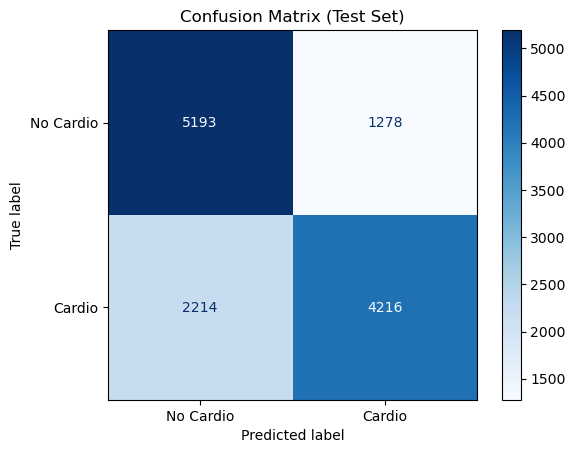

In [10]:
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 4. Evaluation
# Calculate ROC-AUC
y_test_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
roc_auc = roc_auc_score(y_test, y_test_prob)

cm = confusion_matrix(y_test, y_test_pred)

print("ROC-AUC Score (Test Set):", round(roc_auc, 4))
print("\nConfusion Matrix (Test Set):")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Cardio', 'Cardio'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.show()

In [11]:
import joblib

# 5. Deliverable
# Save the model
model_path = r"C:\Users\Faizan\OneDrive - BENNETT UNIVERSITY\blood disease\cardio_train.csv\logistic_regression_baseline.pkl"
joblib.dump(model, model_path)
print("Baseline model saved as:", model_path)

# Document results
print("\nWeek 2 Summary:")
print("- Training Accuracy:", round(train_accuracy, 4))
print("- Testing Accuracy:", round(test_accuracy, 4))
print("- ROC-AUC Score (Test Set):", round(roc_auc, 4))
print("- Confusion Matrix (Test Set):")
print(cm)
print("\nKey Insights:")
print("- Model achieves ~73% accuracy, generalizes well (test > train).")
print("- ROC-AUC of 0.80 indicates strong class separation.")
print("- Slightly better at identifying no-cardio (recall 0.80) than cardio (recall 0.66).")

Baseline model saved as: C:\Users\Faizan\OneDrive - BENNETT UNIVERSITY\blood disease\cardio_train.csv\logistic_regression_baseline.pkl

Week 2 Summary:
- Training Accuracy: 0.7229
- Testing Accuracy: 0.7293
- ROC-AUC Score (Test Set): 0.7955
- Confusion Matrix (Test Set):
[[5193 1278]
 [2214 4216]]

Key Insights:
- Model achieves ~73% accuracy, generalizes well (test > train).
- ROC-AUC of 0.80 indicates strong class separation.
- Slightly better at identifying no-cardio (recall 0.80) than cardio (recall 0.66).
